In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
data = pd.read_csv('Data/data/forestfires.csv')
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [127]:
np.mean(data['area'])
data['label'] = np.where(data['area']<13, 0, 1)
data['label'].value_counts()

0    441
1     76
Name: label, dtype: int64

In [128]:
data.isna().sum() # No null values

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
label    0
dtype: int64

In [129]:
data.dtypes # We will have to transform 'month' & 'day'

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
label      int32
dtype: object

In [13]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


(array([508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <a list of 10 Patch objects>)

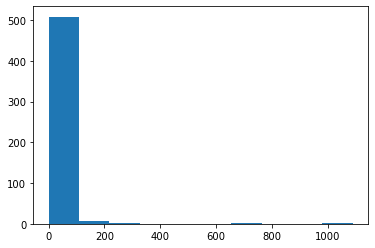

In [130]:
plt.hist(data['area']) # Most of the values of our target variable equal zero. This makes no forest fires our majority case.
# We will deal with the imbalance problem later.

In [131]:
data['month'].value_counts() # We might drop Jan/May/Nov

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [132]:
data['day'].unique() # We will split up 'days' as '0' for weekdays & '1' for weekends.

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [133]:
data['month'].unique() # We will split up 'months' in seasons. So no need to drop months.
# Dec - Feb = Winter = 1
# March - May = Spring = 2
# June -August = Summer = 3
# Sept - Nov = Fall = 4

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [134]:
data.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
label      int32
dtype: object

In [135]:
def rename(string):
    
    if string == 'mon' or string=='tue' or string=='wed' or string=='thu':
        string = 0
    else:
        string = 1
        
    return string

rename('fri')

1

In [136]:
def renamemonth(string):
       
    if string == 'jan' or string=='feb' or string=='dec':
        string = 1
    elif string == 'mar' or string=='apr' or string=='may':
        string = 2
    elif string == 'jun' or string == 'jul' or string == 'aug':
        string = 3
    else:
        string = 4
        
    return string

In [137]:
data['day'] = data['day'].apply(lambda row: rename(row))
data['day'].value_counts()

1    264
0    253
Name: day, dtype: int64

In [138]:
data['month'] = data['month'].apply(lambda row: renamemonth(row))
data['month'].value_counts()

3    233
4    188
2     65
1     31
Name: month, dtype: int64

In [139]:
data = data.drop(columns=['X','Y'])

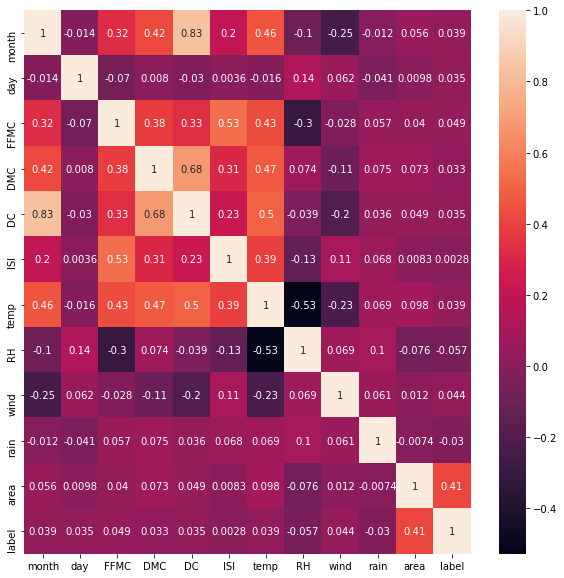

In [140]:
data_corr = data.corr()
fix, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(data_corr, annot=True)

# No really high correlations to be seen.

In [141]:
data.to_csv('DataNoLog.csv', index=False)

In [115]:
# The paper from which the dataset was retrieved advises to normalize the target variable 'area' as well due to the big range.

# When faced with a classification problem imbalance is shown by the distribution of majority class vs minority class which is a
# binary problem. With regression imbalance is mostly caused by a big range of the target value. Where the distribution is then
# skewed to one or the other way.

# This makes it easier for neural networks to calculate and get more accurate results, especially with the imbalance problem.
# We will do this by using the following formula: Area(x) = ln(x+1)
# After we have run the model we must keep in mind to 'undo' this transformation in order to interpret our result.

def ln_transform(area):
    
    area = np.log(area+1)
    
    return area

data['area'] = data['area'].apply(lambda row: ln_transform(row))
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,2,1,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.000000
1,4,0,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.000000
2,4,1,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.000000
3,2,1,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.000000
4,2,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
512,3,1,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871
513,3,1,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592
514,3,1,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498152
515,3,1,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000


(array([275.,  61.,  59.,  54.,  29.,  21.,   9.,   6.,   1.,   2.]),
 array([0.        , 0.69956196, 1.39912393, 2.09868589, 2.79824785,
        3.49780981, 4.19737178, 4.89693374, 5.5964957 , 6.29605766,
        6.99561963]),
 <a list of 10 Patch objects>)

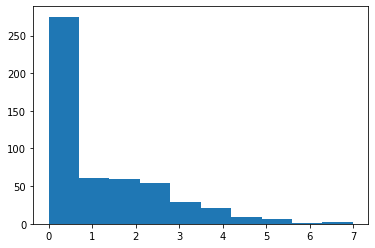

In [119]:
plt.hist(data['area'])

In [142]:
data.to_csv('Data1.csv', index=False)